# Testing GD Variants on FashionMNIST

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

https://github.com/zalandoresearch/fashion-mnist


<img src="https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png">



In [1]:
!pip install tensorflow-addons

In [2]:
! wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
! wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
! wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
! wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz

--2019-12-11 10:30:12--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.74.166
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.74.166|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [binary/octet-stream]
Saving to: ‘train-images-idx3-ubyte.gz.1’

train-images-idx3-u 100%[===================>]  25.20M  6.49MB/s    in 3.9s    

2019-12-11 10:30:17 (6.49 MB/s) - ‘train-images-idx3-ubyte.gz.1’ saved [26421880/26421880]

--2019-12-11 10:30:18--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.74.7
Connecting to fashion-mnist.s3-website.eu-central-1.am

In [0]:
import numpy as np
import os
import gzip
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from math import ceil

In [0]:


def load_mnist(path, kind='train'):
    """Load MNIST data from `path`.
    """
    labels_path = os.path.join(path,'%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path,'%s-images-idx3-ubyte.gz' % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [5]:

train_images, train_labels = load_mnist('.')
# because of some limitations of Keras's softmax implementation, it's 
# advisable to normalise the images by dividing the intensities by the
# maximal 255 value
train_images = train_images / 255.

#valid_test_images, valid_test_labels = load_mnist('.', 't10k')
#valid_test_images = valid_test_images / 255. # the same normalization for valid and test

X_train, X_valid_test, y_train, y_valid_test = train_test_split(train_images, train_labels, test_size=0.1, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test, y_valid_test, test_size=0.5, random_state=42)


train_images= X_train
train_labels= y_train
valid_images= X_valid
valid_labels= y_valid

test_images = X_test
test_labels = y_test

## CNN or just dense
CNN = False
if(CNN):
  train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
  valid_images = valid_images.reshape(valid_images.shape[0], img_rows, img_cols, 1)
  test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)



print(train_images.shape, valid_images.shape, test_images.shape)

(54000, 784) (3000, 784) (3000, 784)


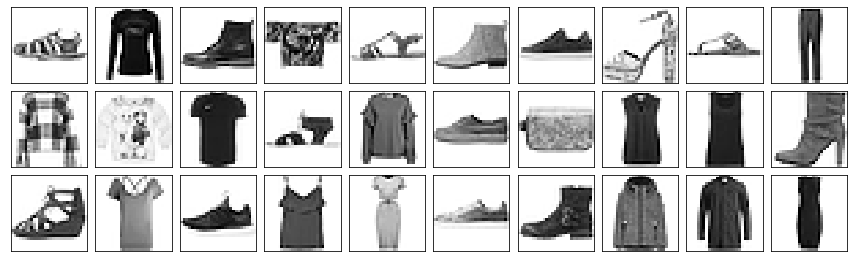

In [6]:


def show_images(images):
    """Show images in a grid
    """
    n_rows = ceil(len(images) / 10)
    fig, ax = plt.subplots(n_rows, 10, figsize=(15, 1.5 * n_rows),
                           subplot_kw={'xticks':[], 'yticks':[]},
                           gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, _ in enumerate(images):
        # below we scale back the intensities to display the images correctly
        ax[i // 10, i % 10].imshow(255 * images[i].reshape(28, 28), cmap='Greys')

show_images(train_images[:30])
plt.show();

In [0]:
#import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adadelta, Adam, SGD, Adagrad, RMSprop
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.regularizers import l1
from tensorflow.keras.backend import clear_session

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
#import tensorflow.addons as tfa
import tensorflow_addons as tfa
import pandas as pd


In [0]:
# Fix seeds for (hopefully) reproducible results
from numpy.random import seed
seed(14)
#from tensorflow import set_random_seed
#set_random_seed(19)


In [0]:

n_classes = 10

#FOR DNN
layer_size = 120
input_size = 784
activation_function='relu'
dropout_rate=0.4
layer_blocks=4

# FOR CNN
nb_filters = 32
pool_size = 2
kernel_size = 3
img_rows=28
img_cols=28
input_shape = (img_rows, img_cols,1)


In [10]:
def generate_dense_model():
  input_layer = Input(shape=(input_size,))
  cur_last_layer = input_layer

  for i in range(layer_blocks):
    cur_last_layer=Dense(units=layer_size, activation=activation_function)(cur_last_layer)
    cur_last_layer=Dropout(rate=dropout_rate)(cur_last_layer)
  
  #Use Softmax!
  predictions = Dense( n_classes , activation='softmax')(cur_last_layer)

  # Full model
  # Instantiate with input and output
  model = Model(inputs=input_layer,outputs=predictions)

  return model

def generate_cnn_model(nb_filters,kernel_size,pool_size,input_shape):
    
    model = Sequential()
    model.add(Convolution2D(filters= nb_filters,kernel_size=(kernel_size,kernel_size),input_shape = input_shape,activation='relu'))
    model.add(MaxPooling2D(pool_size=(pool_size,pool_size)))

    model.add(Convolution2D(filters=nb_filters, kernel_size=(kernel_size,kernel_size),activation='relu'))
    model.add(MaxPooling2D(pool_size=(pool_size,pool_size)))

    model.add(Dropout(0.25))
    model.add(Flatten())

    model.add(Dense(128 , activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(n_classes, activation='softmax'))
    return model

model = None

if CNN:

  clear_session()
  model=generate_cnn_model(nb_filters,kernel_size,pool_size,input_shape)
else:
  clear_session()
  model=generate_dense_model()

model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 120)               94200     
_________________________________________________________________
dropout (Dropout)            (None, 120)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               14520     
_________________________________________________________________
dropout_1 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 120)               14520     
_________________________________________________________________
dropout_2 (Dropout)          (None, 120)               0     

In [0]:



save_callback= ModelCheckpoint("./model.h5", monitor='val_loss', 
                                verbose=0, save_best_only=True, 
                                save_weights_only=False, mode='auto')




def compile_fit(model,selected_optimizer,nr_epochs):
  #Compile
  model.compile(optimizer=selected_optimizer,
              loss=loss,
              metrics=['accuracy'])
  #fit and return history
  history = model.fit(x=train_images, y=train_labels,
                    validation_data=(valid_images, valid_labels),
                    epochs=nr_epochs,
                    batch_size=200,
                    verbose=0
 #                  ,callbacks=[save_callback]
                   )
  return history



In [0]:


# Loss 
loss = sparse_categorical_crossentropy 


# Optimizers
lr=0.01

sgd=SGD(learning_rate=lr)
adam=Adam()
adagrad=Adagrad(learning_rate=lr)
rmsprop=RMSprop(learning_rate=lr)
adadelta=Adadelta(learning_rate=lr)
radam = tfa.optimizers.RectifiedAdam()
ranger = tfa.optimizers.Lookahead(radam, sync_period=4, slow_step_size=0.6)

optimizers={
    "sgd":sgd,
    "adam":adam,
    "adagrad":adagrad,
    "rmsprop":rmsprop,
    "adadelta":adadelta,
    "radam":radam,
    "ranger":ranger
}



In [39]:


def clear_and_fit(history_dict, optimizer_key, optimizer,nr_epochs):
  print("training with:", optimizer_key  )
  clear_session()
  model = None
  if CNN:
    model=generate_cnn_model(nb_filters,kernel_size,pool_size,input_shape)
  else:
    model=generate_dense_model()
  history=compile_fit(model,optimizer,nr_epochs)
  history_dict[optimizer_key]=history

history_dict={}

nr_optimizers=len(optimizers)
times_one_opitmizer_run=3
nr_epochs=50
results=np.empty((nr_optimizers, times_one_opitmizer_run, nr_epochs))


for i in range(times_one_opitmizer_run):
  for n, key in enumerate(optimizers):
    print(i,n,key)
    clear_and_fit(history_dict,key,optimizers[key],nr_epochs)
    data=history_dict[key].history['val_accuracy']
    results[n,i,:] =data

   



0 0 sgd
training with: sgd
0 1 adam
training with: adam
0 2 adagrad
training with: adagrad
0 3 rmsprop
training with: rmsprop
0 4 adadelta
training with: adadelta
0 5 radam
training with: radam
0 6 ranger
training with: ranger
1 0 sgd
training with: sgd
1 1 adam
training with: adam
1 2 adagrad
training with: adagrad
1 3 rmsprop
training with: rmsprop
1 4 adadelta
training with: adadelta
1 5 radam
training with: radam
1 6 ranger
training with: ranger
2 0 sgd
training with: sgd
2 1 adam
training with: adam
2 2 adagrad
training with: adagrad
2 3 rmsprop
training with: rmsprop
2 4 adadelta
training with: adadelta
2 5 radam
training with: radam
2 6 ranger
training with: ranger


In [13]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
file_path=None
if CNN:
  file_path='/content/gdrive/My Drive/development/results_CNN.dat'
else:
  file_path='/content/gdrive/My Drive/development/results_DNN.dat'


In [0]:
np.save(file_path,results,allow_pickle=True)

In [0]:
results=np.load(file_path+".npy",allow_pickle=True)

In [45]:

print(results.shape)


(7, 3, 50)


In [49]:
mean_values=results.mean(axis=(1))
mean_values.shape

(7, 50)

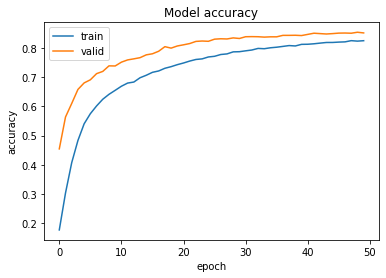

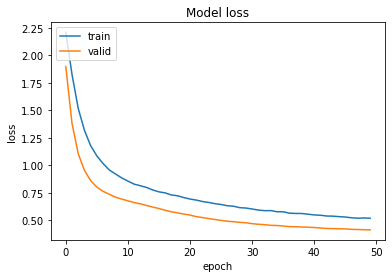

In [47]:
def display_history(history):
    """Summarize history for accuracy and loss.
    """
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()


display_history(history_dict['sgd'])

# Wait a minute! 
Why is the Valid loss is smaller than the training loss?

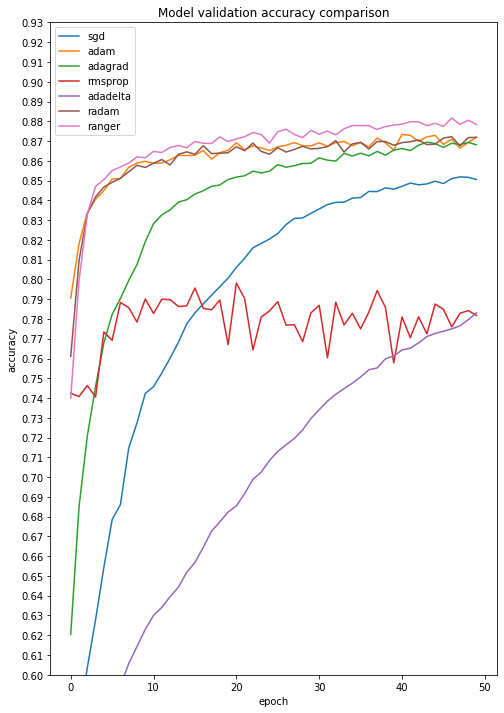

In [48]:
legend_list=[]
plt.figure(num=None, figsize=(8, 12))
for n, key in enumerate(optimizers):    

  #history=history_dict[key]
  #plt.plot(history.history['accuracy'])
  plt.plot(mean_values[n])
  legend_list.append(key)

plt.title('Model validation accuracy comparison')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0.6, .93)
plt.yticks(np.arange(0.6, .93, step=0.01))
plt.legend(legend_list, loc='upper left')
plt.show()